In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=df.iloc[:, [3,4]].values

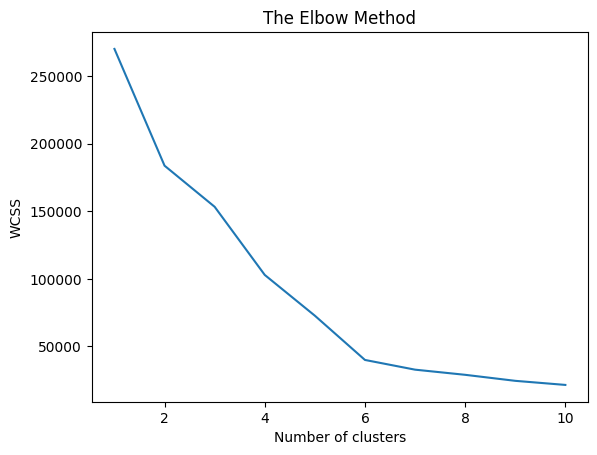

In [4]:
from sklearn.cluster import BisectingKMeans
list1=[]
for i in range(1, 11):
    B_kmeans=BisectingKMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    B_kmeans.fit(x)
    list1.append(B_kmeans.inertia_)
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
B_kmeans=BisectingKMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans=B_kmeans.fit_predict(x)
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0,
       3, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 5, 4, 1, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [7]:
supervised=df

In [8]:
supervised['Cluster_values']=y_kmeans
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_values
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,5
197,198,Male,32,126,74,4
198,199,Male,32,137,18,5


In [9]:
supervised.to_csv("clustered_data.csv", index=False)

In [11]:
centriods=B_kmeans.cluster_centers_
centriods

array([[ 30.10344828,  74.44827586],
       [ 79.67857143,  16.53571429],
       [ 55.7260274 ,  48.83561644],
       [ 25.72727273,  20.22727273],
       [ 86.53846154,  82.12820513],
       [111.        ,  22.77777778]])

In [ ]:
#pip install seaborn

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


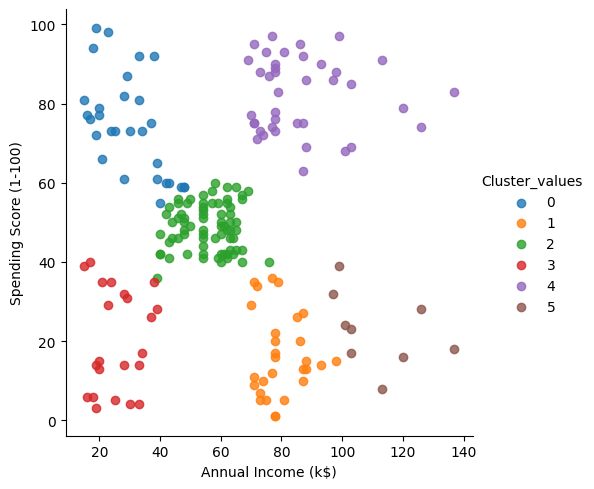

In [12]:
import seaborn as sns
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                 fit_reg=False, legend=True, legend_out=True)